# Linear regression with scikit-learn

Linear Regression topics:

1. Getting and set up the data
2. Visualizing the data
3. MSE
4. Numpy for Univariate Linear Regression
5. Get the error
6. Multivariate Linear Regression
7. Training and Validation
8. Price prediction
9. Residual Data

## Step 1: Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
### import data from scikit-learn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
### Get insight 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Get insights of the data

Distribution of the average price in $1000s

Text(0,0.5,'Number of houses')

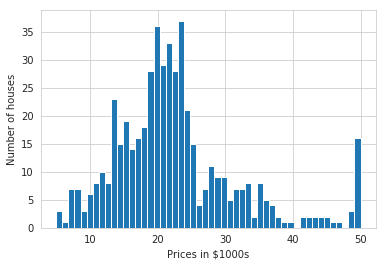

In [5]:
plt.hist(boston.target, bins=50) #506 instances
plt.xlabel("Prices in $1000s")
plt.ylabel("Number of houses")

Text(0.5,0,'Number of rooms')

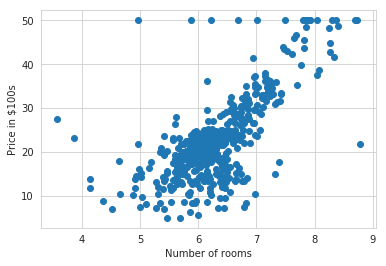

In [6]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel("Price in $100s")
plt.xlabel("Number of rooms")

# Price increases along with num of rooms in a house

In [7]:
boston_df = DataFrame(boston.data) #on the data, not targets
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#set up the targets

boston_df["Price"] = boston.target

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Visualizing relation Room Feature vs. Price

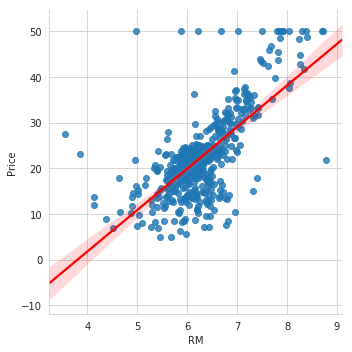

In [10]:
sns.lmplot("RM", "Price", data=boston_df, line_kws={'color': 'red'}) #linear fit model through the data

## Error function: MSE

How do we know, when the line is the best fit line?

In [11]:
from IPython.display import Image

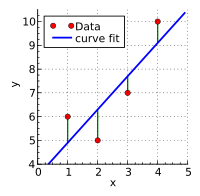

In [12]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/200px-Linear_least_squares_example2.svg.png"
Image(url)

In [13]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

In [14]:
## Linear Regression
## y = mx+b
## Matricial form
## y = Ap
### A = [x 1], A = [506, 1] # 1 stands for "how many attributes we have"
### p = [m b]^T

# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ],  dtype='float' )
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [15]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

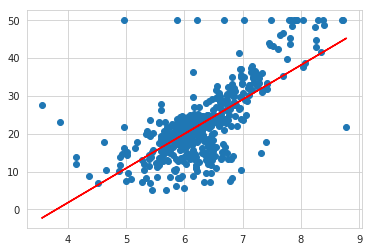

In [16]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Getting the Error

In [17]:
# Get resulting array
result = np.linalg.lstsq(X,Y)

In [18]:
len(result)

4

In [19]:
error_total = result[1]
error_total

array([22061.87919621])

In [20]:
rmse = np.sqrt(error_total/len(X))
rmse # Root mean squared error

array([6.60307139])

### Linear Regression with scikit-learn

In [21]:
import sklearn
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
X_multi = boston_df.drop("Price",1) #all attributes
Y_target = boston_df.Price

In [24]:
lr.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print("Estimated coefficients:")
print(lr.intercept_)
print(len(lr.coef_))

Estimated coefficients:
36.45948838508978
13


In [26]:
coeff_df = DataFrame(boston_df.columns[:-1])
coeff_df.columns = ["Features"]

coeff_df["Coefficent Estimate"] = pd.Series(lr.coef_)

coeff_df

,Features,Coefficent Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Split training and validation

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, boston_df.Price)

In [29]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [30]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [33]:
print("Fit a model X_train and compute MSE with Y_train: %.4f" %np.min((Y_train-pred_train)**2))
print("Fit a model X_Test and compute MSE with Y_test: %.4f" %np.min((Y_test-pred_test)**2))

Fit a model X_train and compute MSE with Y_train: 0.0000
Fit a model X_Test and compute MSE with Y_test: 0.0001


Text(0.5,1,'Residual Plots')

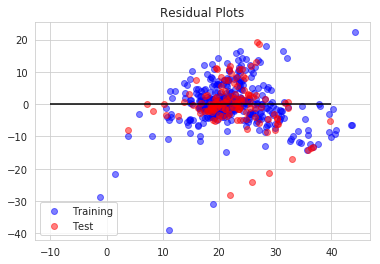

In [41]:
## residual plots

train = plt.scatter(pred_train, (pred_train - Y_train), c="b", alpha=0.5)
test = plt.scatter(pred_test, (pred_test - Y_test), c ="r", alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=40)
plt.legend((train,test), ("Training", "Test"), loc="lower left")
plt.title("Residual Plots")